# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

C:\Users\Алексей\AppData\Local\Temp\ipykernel_15720\3717588703.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.61723242, 0.78873445, 0.87673761],
       [0.31402885, 0.08225907, 0.32585555],
       [0.70585872, 0.484364  , 0.77089366],
       [0.96906987, 0.52594222, 0.97957036],
       [0.24905973, 0.12332847, 0.17588086]])

In [3]:
my_a = np.random.rand(3,3)
my_a

array([[0.43432685, 0.09928713, 0.44012698],
       [0.57081258, 0.36979197, 0.88638466],
       [0.53783233, 0.21995715, 0.11350319]])

In [4]:
b = np.random.rand(3)
b

array([0.25759424, 0.99876059, 0.46577717])

In [5]:
# размеры массива
a.shape

(5, 3)

In [6]:
# сложение
a + 5

array([[5.61723242, 5.78873445, 5.87673761],
       [5.31402885, 5.08225907, 5.32585555],
       [5.70585872, 5.484364  , 5.77089366],
       [5.96906987, 5.52594222, 5.97957036],
       [5.24905973, 5.12332847, 5.17588086]])

In [7]:
# матричное умножение
a @ a.T

array([[1.77174674, 0.54439917, 1.49358493, 1.87179627, 0.40520251],
       [0.54439917, 0.21156251, 0.51270331, 0.66677785, 0.14566858],
       [1.49358493, 0.51270331, 1.32712205, 1.69391848, 0.37112229],
       [1.87179627, 0.66677785, 1.69391848, 2.17526973, 0.4785076 ],
       [0.40520251, 0.14566858, 0.37112229, 0.4785076 , 0.10817473]])

In [8]:
# среднее по колонкам
a.mean(axis=-1)

array([0.7609015 , 0.24071449, 0.65370546, 0.82486082, 0.18275635])

In [9]:
# Среднее по строкам
a.mean(axis=0)

array([0.57104992, 0.40092564, 0.62578761])

In [10]:
# решейп
a = a.reshape(3, 5)
a

array([[0.61723242, 0.78873445, 0.87673761, 0.31402885, 0.08225907],
       [0.32585555, 0.70585872, 0.484364  , 0.77089366, 0.96906987],
       [0.52594222, 0.97957036, 0.24905973, 0.12332847, 0.17588086]])

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000. ✅

In [11]:
sum(np.arange(4) ** 2)

14

In [12]:
np.arange(4)

array([0, 1, 2, 3])

In [13]:
np.arange(4) ** 2

array([0, 1, 4, 9])

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [14]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.6802, 0.5325, 0.2379],
        [0.7803, 0.5596, 0.4985],
        [0.3880, 0.6777, 0.7401],
        [0.3551, 0.5733, 0.5200],
        [0.6549, 0.6851, 0.1175]])

In [15]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [16]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [17]:
# сложение
x + 5

tensor([[5.6802, 5.5325, 5.2379],
        [5.7803, 5.5596, 5.4985],
        [5.3880, 5.6777, 5.7401],
        [5.3551, 5.5733, 5.5200],
        [5.6549, 5.6851, 5.1175]])

In [18]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.8028, 0.9473, 0.8008, 0.6705, 0.8382],
        [0.9473, 1.1705, 1.0509, 0.8571, 0.9529],
        [0.8008, 1.0509, 1.1575, 0.9111, 0.8053],
        [0.6705, 0.8571, 0.9111, 0.7252, 0.6864],
        [0.8382, 0.9529, 0.8053, 0.6864, 0.9120]])

In [19]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.8028, 0.9473, 0.8008, 0.6705, 0.8382],
        [0.9473, 1.1705, 1.0509, 0.8571, 0.9529],
        [0.8008, 1.0509, 1.1575, 0.9111, 0.8053],
        [0.6705, 0.8571, 0.9111, 0.7252, 0.6864],
        [0.8382, 0.9529, 0.8053, 0.6864, 0.9120]])

In [20]:
# поэлементное умножение
x * x

tensor([[0.4627, 0.2835, 0.0566],
        [0.6088, 0.3132, 0.2485],
        [0.1505, 0.4593, 0.5477],
        [0.1261, 0.3287, 0.2704],
        [0.4289, 0.4693, 0.0138]])

In [21]:
# среднее по колонкам
x.mean(dim=-1)

tensor([0.4835, 0.6128, 0.6019, 0.4828, 0.4858])

In [22]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [23]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [24]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000. ✅

In [25]:
sum(torch.arange(4)**2)
# np.arange -> torch.arange

tensor(14)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [26]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[-3.1275e-02,  1.8301e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])

In [27]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.4482, 0.2072, 0.3419],
        [0.3456, 0.4955, 0.8033],
        [0.4675, 0.3260, 0.4949],
        [0.8781, 0.5678, 0.6047],
        [0.3679, 0.9860, 0.5268]])

In [28]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float64)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [29]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [30]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.float64)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [31]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[ 0.0776, -0.1380,  0.0579],
        [-0.1564, -1.6441,  0.0074],
        [ 0.9768,  0.8079,  0.8700],
        [-0.2427,  0.7946,  0.5098],
        [ 0.5710,  0.1380, -1.2473]])

In [32]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [33]:
x

tensor([[0.4542, 0.3013, 0.7214],
        [0.7470, 0.4744, 0.7774],
        [0.6829, 0.5750, 0.6147],
        [0.7360, 0.5981, 0.7699],
        [0.4646, 0.7648, 0.7494]])

In [34]:
y

tensor([[0.0690, 0.0292, 0.6621],
        [0.3274, 0.8680, 0.2807],
        [0.8211, 0.5829, 0.8877],
        [0.4273, 0.0448, 0.6912],
        [0.1958, 0.0940, 0.4710]])

In [35]:
# сложение
x + y

tensor([[0.5232, 0.3305, 1.3835],
        [1.0743, 1.3424, 1.0581],
        [1.5040, 1.1579, 1.5024],
        [1.1633, 0.6429, 1.4611],
        [0.6604, 0.8588, 1.2204]])

In [36]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[0.5232, 0.3305, 1.3835],
        [1.0743, 1.3424, 1.0581],
        [1.5040, 1.1579, 1.5024],
        [1.1633, 0.6429, 1.4611],
        [0.6604, 0.8588, 1.2204]])

In [37]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[0.5232, 0.3305, 1.3835],
        [1.0743, 1.3424, 1.0581],
        [1.5040, 1.1579, 1.5024],
        [1.1633, 0.6429, 1.4611],
        [0.6604, 0.8588, 1.2204]])

In [38]:
x

tensor([[0.5232, 0.3305, 1.3835],
        [1.0743, 1.3424, 1.0581],
        [1.5040, 1.1579, 1.5024],
        [1.1633, 0.6429, 1.4611],
        [0.6604, 0.8588, 1.2204]])

In [39]:
# добавили измерение в начало, аналог броадкастинга
x = x.unsqueeze(0)

In [40]:
x

tensor([[[0.5232, 0.3305, 1.3835],
         [1.0743, 1.3424, 1.0581],
         [1.5040, 1.1579, 1.5024],
         [1.1633, 0.6429, 1.4611],
         [0.6604, 0.8588, 1.2204]]])

In [41]:
# получается просто добавили по одной скобочке слева и справа (броадкастинг?)

In [42]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 1, 5, 3])

In [43]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [44]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([1, 5, 3])

In [45]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [46]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [47]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [48]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [49]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

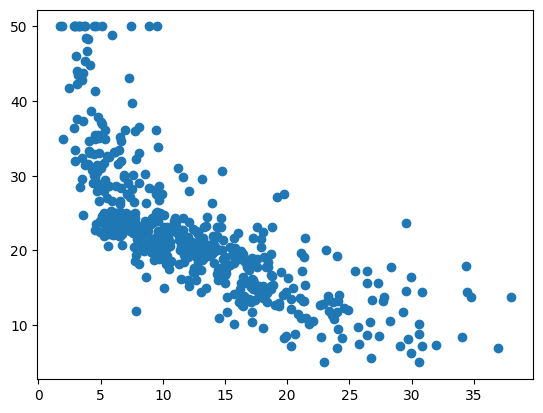

In [50]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

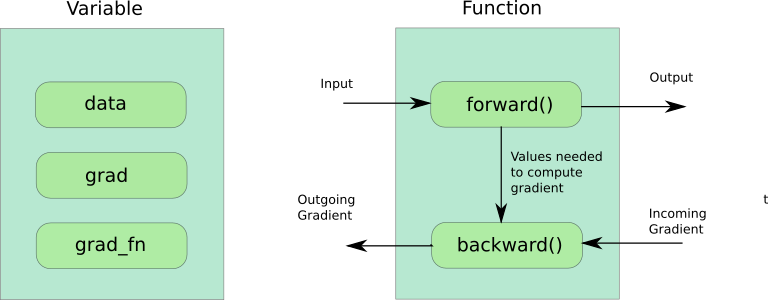

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [51]:
w = torch.rand(1)
w

tensor([0.0973])

In [52]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [53]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [54]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [55]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.7179])
dL/db = tensor([-42.8834])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [56]:
w.data, w.grad

(tensor([0.3633]), tensor([-11.7179]))

In [57]:
w

tensor([0.3633], requires_grad=True)

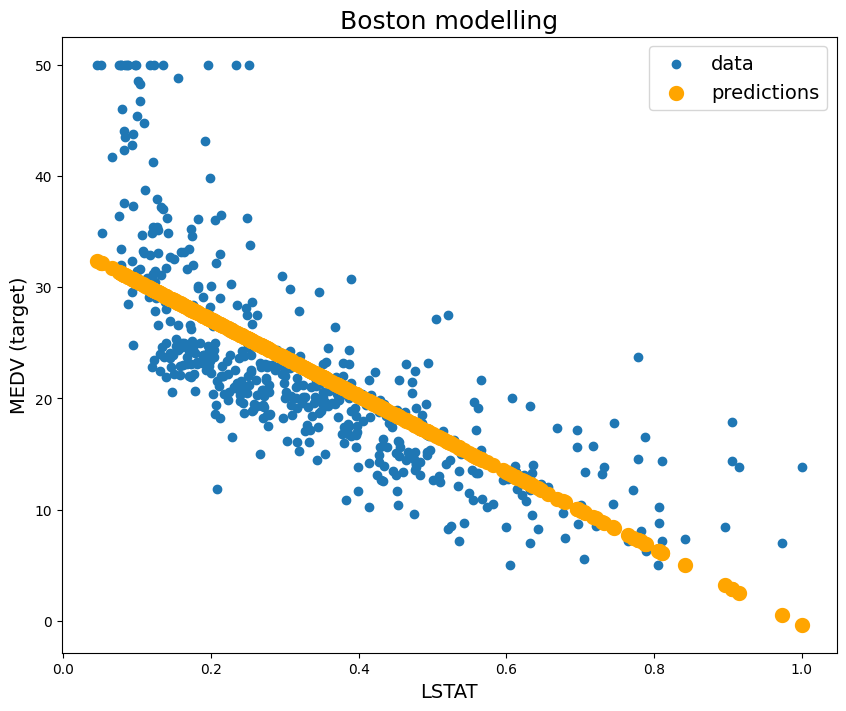

loss =  38.597595


In [58]:
from IPython.display import clear_output

for i in range(1000):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [59]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [60]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [61]:
our_dataset = RandomDataset(x, y)

In [62]:
our_dataset.__getitem__(1)

{'sample': tensor([0.7997, 0.5088, 0.1383, 0.8745, 0.5096]),
 'target': 0.022964881518167113}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [63]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [64]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[6.0908e-01, 2.8312e-01, 8.4766e-01, 2.7714e-01, 8.8999e-01],
        [7.9973e-01, 5.0882e-01, 1.3832e-01, 8.7451e-01, 5.0963e-01],
        [8.0410e-01, 4.8240e-01, 5.0166e-01, 5.3747e-04, 3.2631e-01],
        [8.7305e-01, 6.2910e-02, 8.6534e-01, 1.0328e-01, 1.8397e-02]])
Target:
tensor([0.6985, 0.0230, 0.8643, 0.4230], dtype=torch.float64)


**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [65]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 30)
)  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(30, 1)
)  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(  nn.Linear(5, 30),
                                nn.ReLU(),
                                nn.Linear(30, 1)  )

In [66]:
y_pred = model(batch["sample"])  # получили предсказания модели

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [67]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

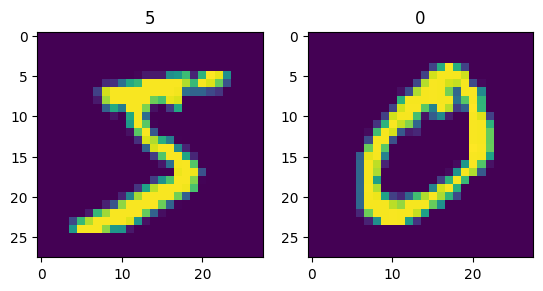

In [68]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [69]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # Передаем параметры модели и лернинг рейт

Веса моделей хранятся в виде матриц и выглядят так:

In [70]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[ 2.6208e-02,  4.2857e-03, -1.9754e-02,  ..., -1.3309e-02,
            1.7071e-02, -2.8507e-02],
          [-4.0168e-03, -2.5133e-02, -1.2145e-02,  ..., -2.7193e-02,
           -2.2547e-02,  3.1106e-02],
          [-2.7600e-02, -3.0290e-02, -2.2804e-02,  ...,  1.1044e-03,
           -9.8683e-05,  5.9876e-03],
          ...,
          [ 2.3800e-02,  1.7413e-02, -2.1078e-03,  ...,  2.4911e-02,
           -1.1972e-02,  6.1441e-03],
          [ 4.1232e-03,  2.2381e-02, -3.4014e-02,  ..., -2.4082e-02,
           -3.4518e-02, -1.3364e-02],
          [ 6.7567e-03, -6.1883e-03, -1.5252e-02,  ...,  2.4702e-02,
            3.1838e-02, -1.3943e-02]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0192, -0.0150, -0.0209, -0.0346, -0.0298, -0.0108,  0.0138,  0.0353,
          -0.0289,  0.0312, -0.0293,  0.0170, -0.0032,  0.0003, -0.0011,  0.0300,
           0.0099, -0.0322, -0.0025, -0.0341,  0.0207, -0.0218,  0.0080,  0.0051,


Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [71]:
import wandb

In [72]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login 6afbf9506c83e5958753d34715e32158a3dc50e7
#wandb.login()

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Алексей\.netrc


In [73]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: reggaesharkneedow. Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [74]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [75]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.7978, 0.6964],
        [0.9995, 0.8542]])

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [76]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [77]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.12316882610321045, accuracy: 0.9624


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.07863062620162964, accuracy: 0.9772


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.10378007590770721, accuracy: 0.972


### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)